In [43]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing Dataset and Cleaning

In [44]:
diwali_sales_data = pd.read_csv(r"C:\Users\subhasish\Desktop\Subhasish\Python\Python Projects\Diwali Sales Data.csv", encoding = 'unicode_escape')

In [45]:
diwali_sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [46]:
diwali_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [47]:
# Drop status and unnamed1
diwali_sales_data.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [48]:
diwali_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [49]:
diwali_sales_data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [50]:
# Drop null values in amount column
diwali_sales_data.dropna(inplace = True)

In [51]:
diwali_sales_data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [52]:
# Change the datatype of column "Amount" to int
diwali_sales_data["Amount"] = diwali_sales_data["Amount"].astype('int')

In [53]:
diwali_sales_data["Amount"].dtype

dtype('int32')

In [54]:
diwali_sales_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

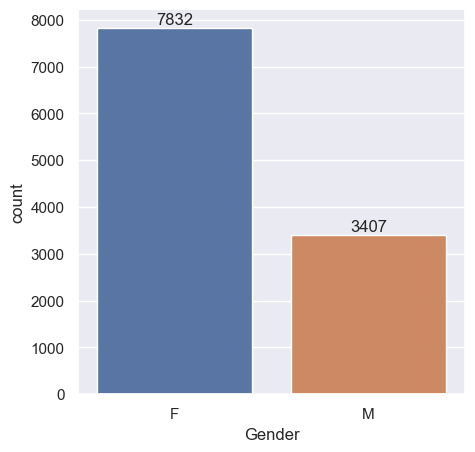

In [108]:
# gender Distribution
ax = sns.countplot(x = "Gender", data = diwali_sales_data)
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

 #### Female were purchased more as compared to males

  Gender    Amount
0      F  74335853
1      M  31913276


Text(0.5, 1.0, 'Sales Data Based on Gender')

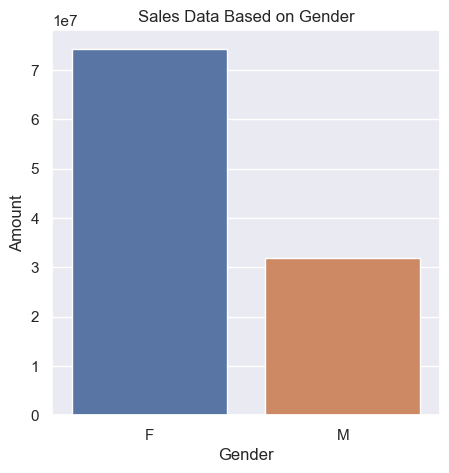

In [113]:
# Sales based on gender
Sales_data_based_on_gender = diwali_sales_data.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
print(Sales_data_based_on_gender)
sns.barplot(x = 'Gender', y = 'Amount', data = Sales_data_based_on_gender)
sns.set(rc={'figure.figsize':(4,5)})
plt.title('Sales Data Based on Gender')

#### Females spends more money as compared to males

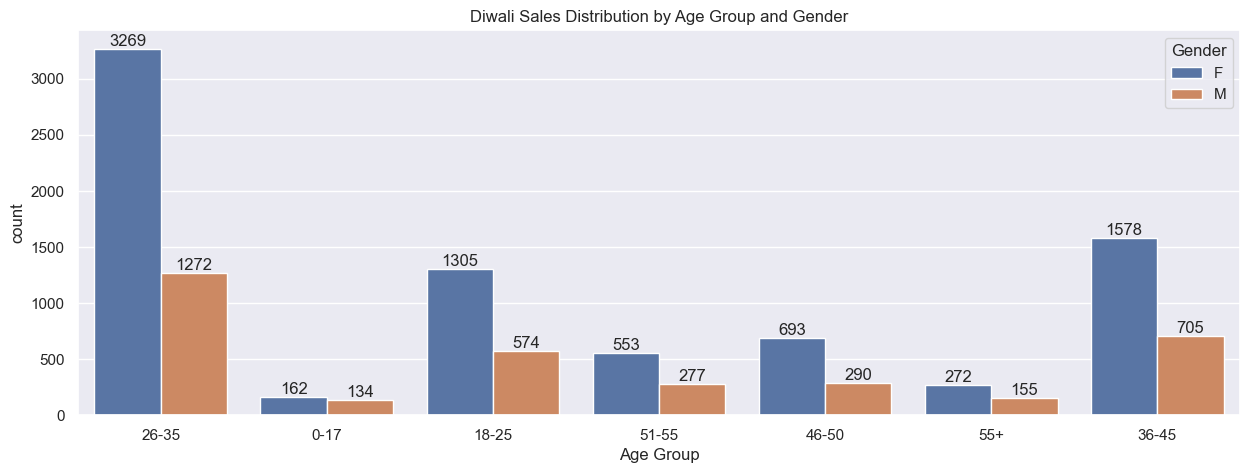

In [57]:
bx = sns.countplot(data = diwali_sales_data, x = 'Age Group', hue = 'Gender' )
plt.title('Diwali Sales Distribution by Age Group and Gender')

for bars in bx.containers:
    bx.bar_label(bars)


#### Most purchased age group is 26-35.

Text(0.5, 1.0, 'Amount Spent by Different Age Group')

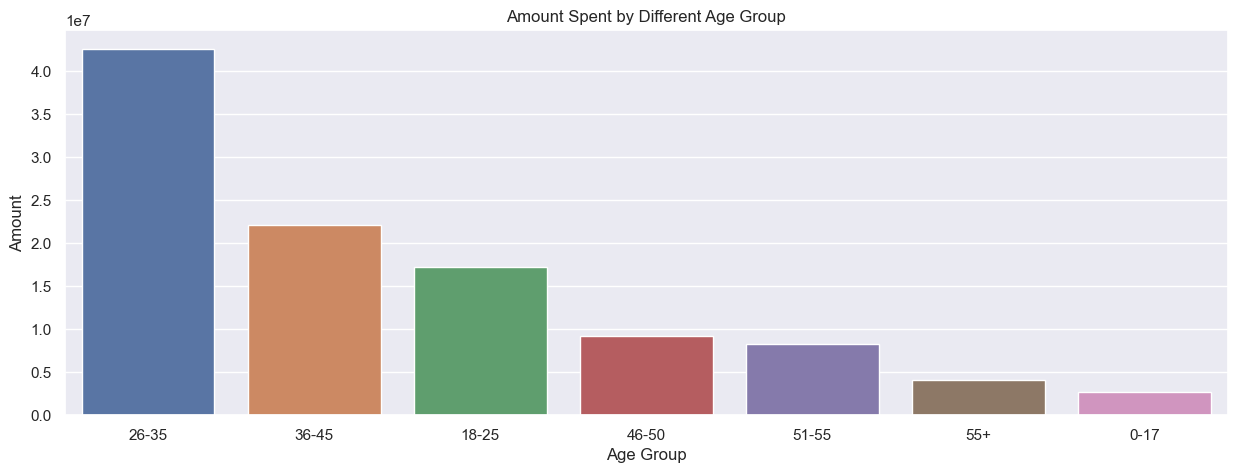

In [58]:
# Total Amount vs Age Group
sales_age = diwali_sales_data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)
plt.title("Amount Spent by Different Age Group")

#### Most revenue comes from 26-35 age group.

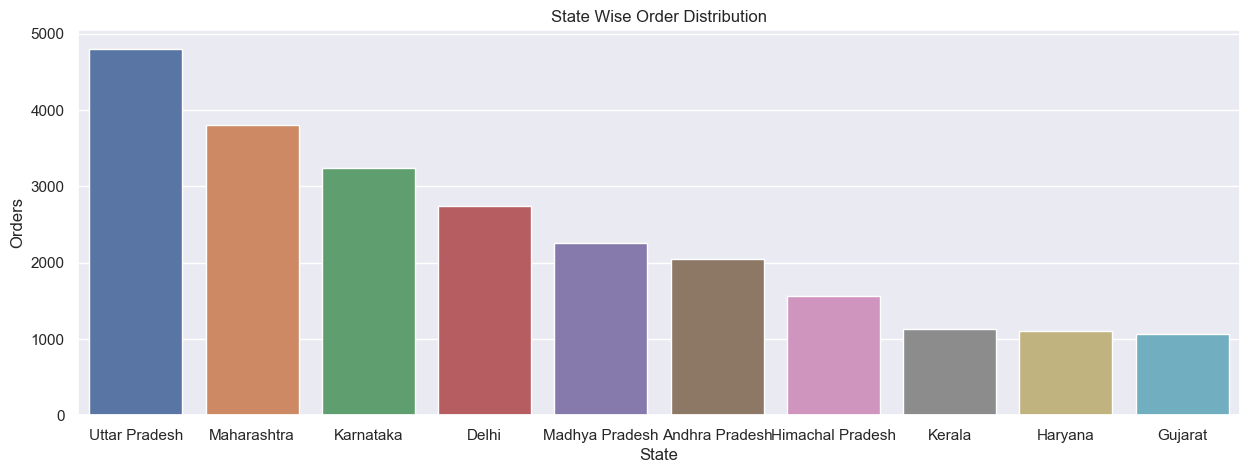

In [59]:
# State wise order distribution
state_order = diwali_sales_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='State', y='Orders', data = state_order)
plt.title("State Wise Order Distribution")
sns.set(rc={'figure.figsize':(15,5)})

#### UP, Maharashtra and Karnataka are the top 3 staes from where maximum order placed.

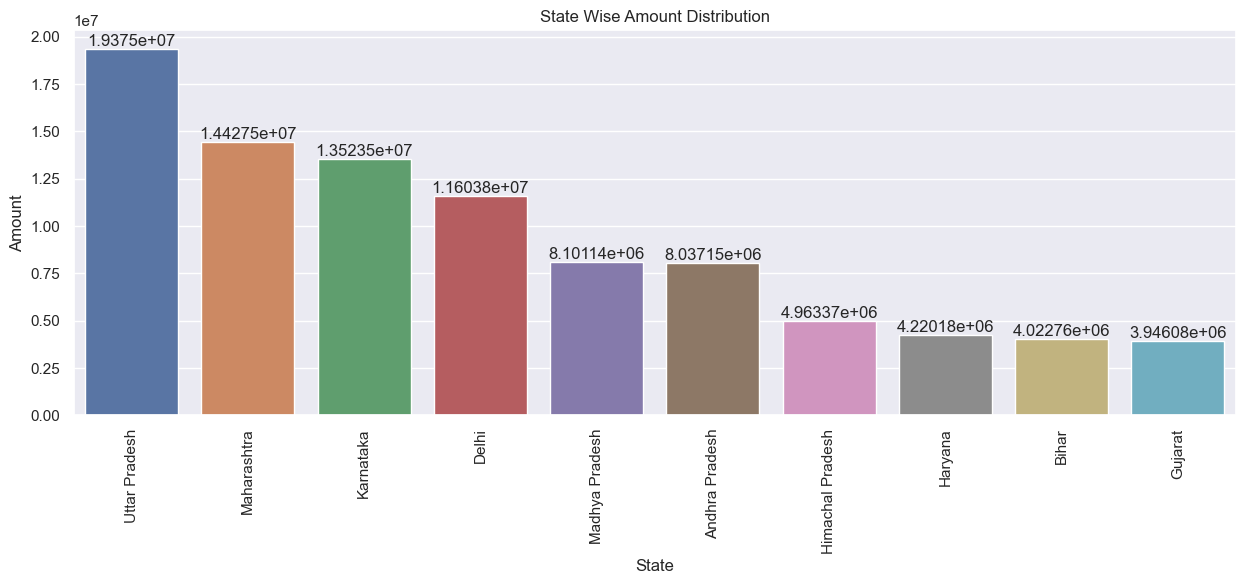

In [91]:
# State wise amount distribution
state_amount = diwali_sales_data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
dx = sns.barplot(x='State', y='Amount', data = state_amount)
plt.title("State Wise Amount Distribution")
sns.set(rc={'figure.figsize':(15,5)})

for bars in dx.containers:
    dx.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

#### UP, Maharashtra and Karnataka are the top 3 staes from where maximum revenue was generated.

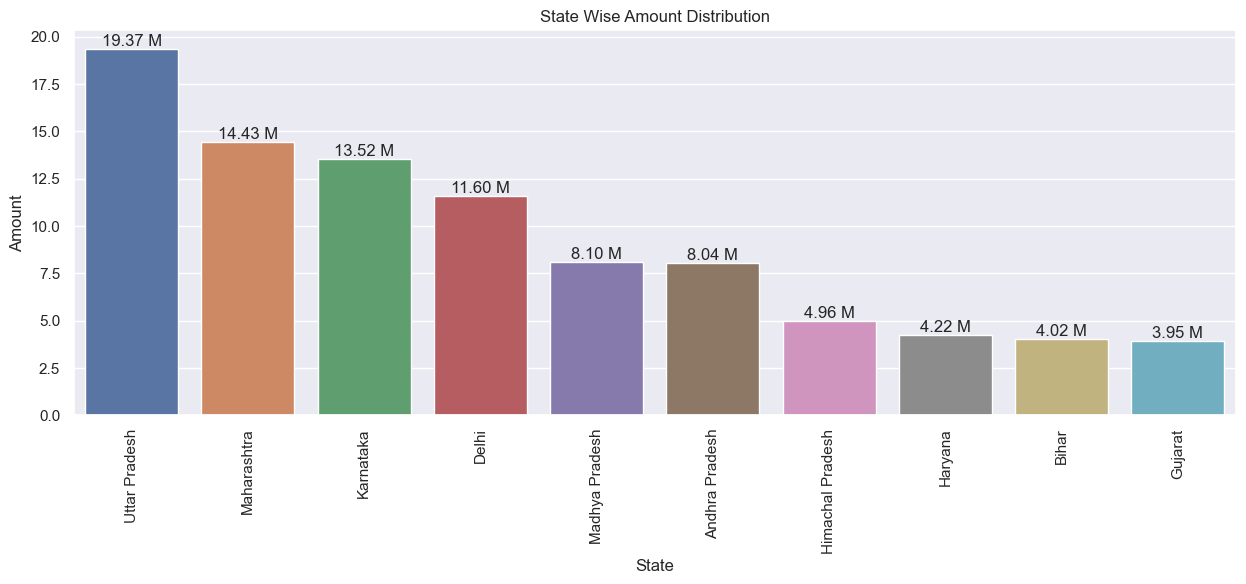

In [90]:
# Stae wise Amount distribition
state_amount = diwali_sales_data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10) 
state_amount['Amount'] = state_amount['Amount'] / 1e6 # Convert amount to millions 
dx = sns.barplot(x='State', y='Amount', data=state_amount) 
plt.title("State Wise Amount Distribution") 
sns.set(rc={'figure.figsize': (15, 5)})
for bars in dx.containers:
    dx.bar_label(bars, fmt='%.2f M')
    
plt.xticks(rotation=90)
plt.show()

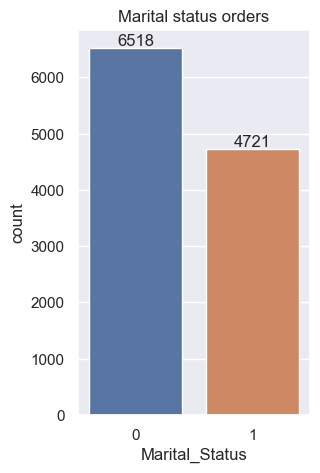

In [75]:
# Marital status
ax = sns.countplot(data = diwali_sales_data, x = 'Marital_Status')
sns.set(rc={'figure.figsize': (3, 5)})
plt.title("Marital status orders")

        
for bars in ax.containers:
    ax.bar_label(bars)

#### Married population placed more order as compared to single.

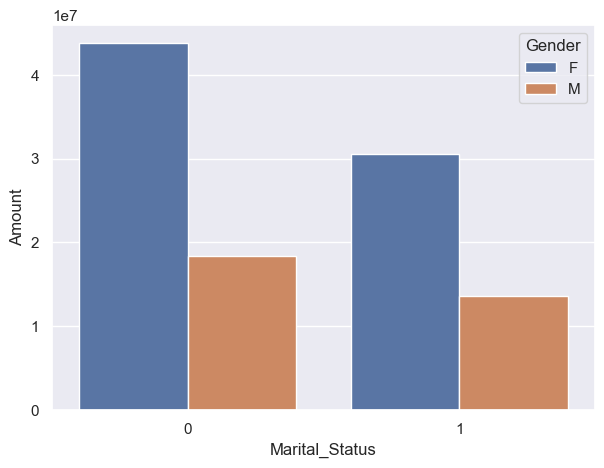

In [82]:
sales_state = diwali_sales_data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue ='Gender')
sns.set(rc={'figure.figsize':(10, 5)})

#### Most revenue came from married female

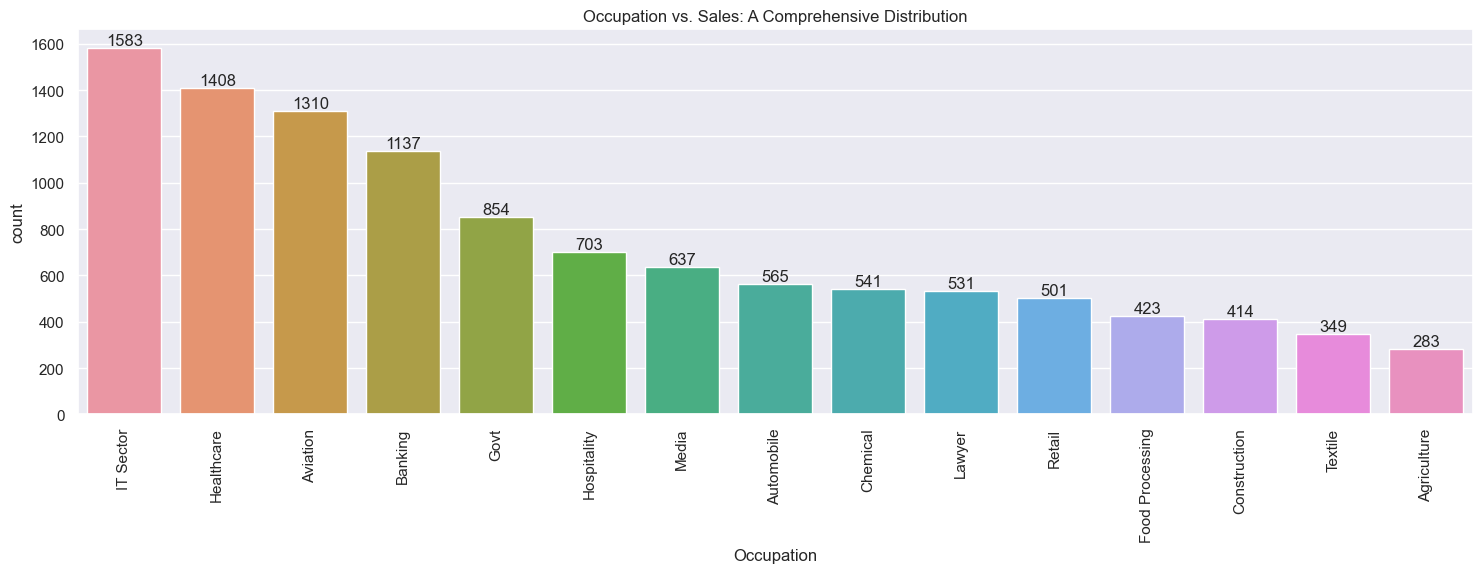

In [115]:
# Job sector wise sales distribution

occupation_counts = diwali_sales_data['Occupation'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize': (18, 5)})
ax = sns.countplot(data=diwali_sales_data, x='Occupation', order=occupation_counts.index)

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title("Occupation vs. Sales: A Comprehensive Distribution")
plt.show()

#### Most revenue came from IT sector, Healthcare and Aviation.

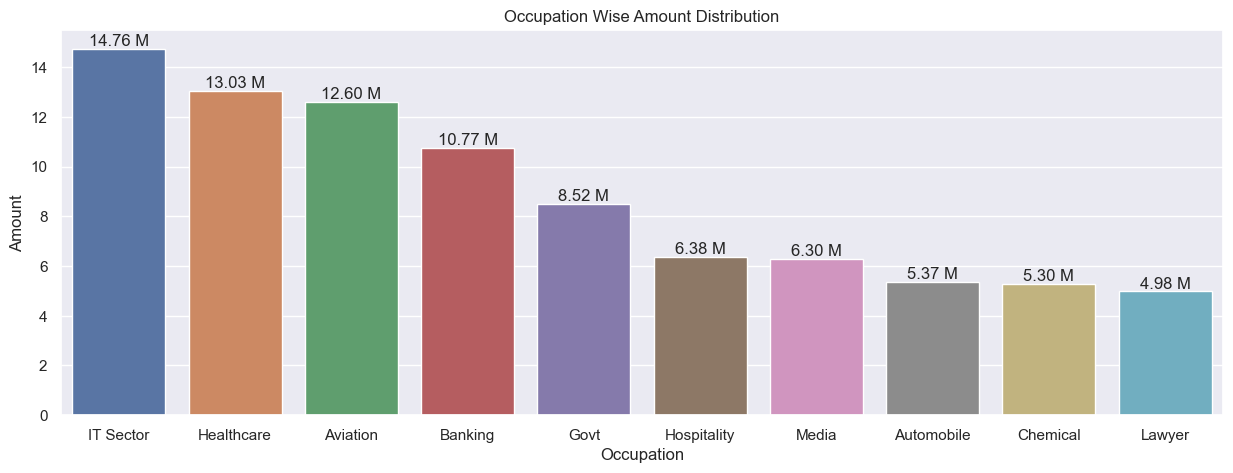

In [94]:
# Occupation wise Amount distribition
occupation_amount = diwali_sales_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10) 
occupation_amount['Amount'] = occupation_amount['Amount'] / 1e6  # Convert amount to millions 
dx = sns.barplot(x='Occupation', y='Amount', data=occupation_amount) 
plt.title("Occupation Wise Amount Distribution") 
sns.set(rc={'figure.figsize': (15, 5)})
for bars in dx.containers:
    dx.bar_label(bars, fmt='%.2f M')
    

plt.show()

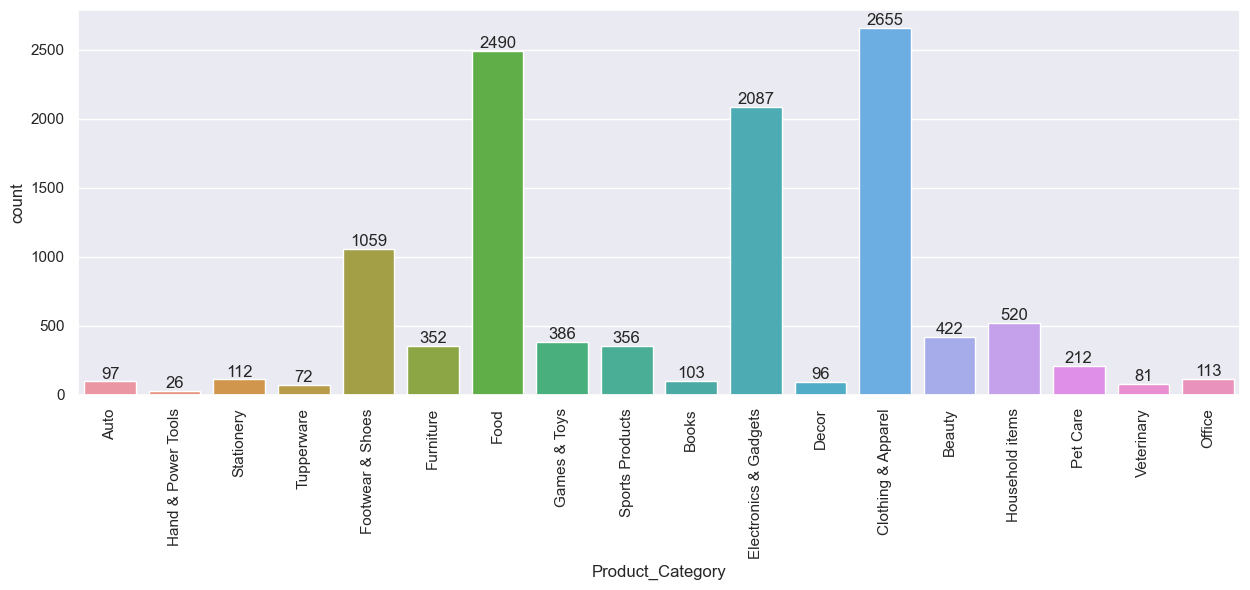

In [98]:
# Product Category
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(data = diwali_sales_data, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation = 90)
plt.show()

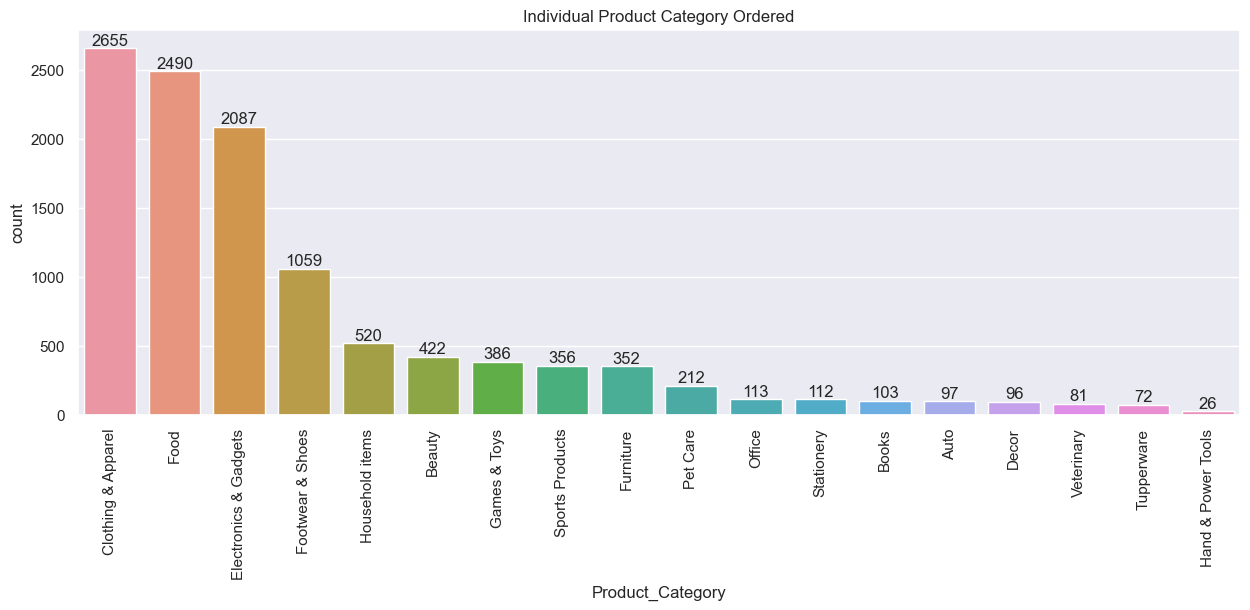

In [105]:
# Sorting the data by count of Product_Category in descending order 
product_category_counts = diwali_sales_data['Product_Category'].value_counts().sort_values(ascending=False)
# Creating the count plot with sorted data 
sns.set(rc={'figure.figsize': (15, 5)}) 
ax = sns.countplot(data=diwali_sales_data, x='Product_Category', order=product_category_counts.index)
# Adding labels to the bars 
for bars in ax.containers:
    ax.bar_label(bars)
# Rotating the x-axis labels 
plt.xticks(rotation=90) 
# Displaying the plot 
plt.title("Individual Product Category Ordered")
plt.show()

#### Clothing and Apparal is the highest ordered item followed by food and Electronics & Gadgets

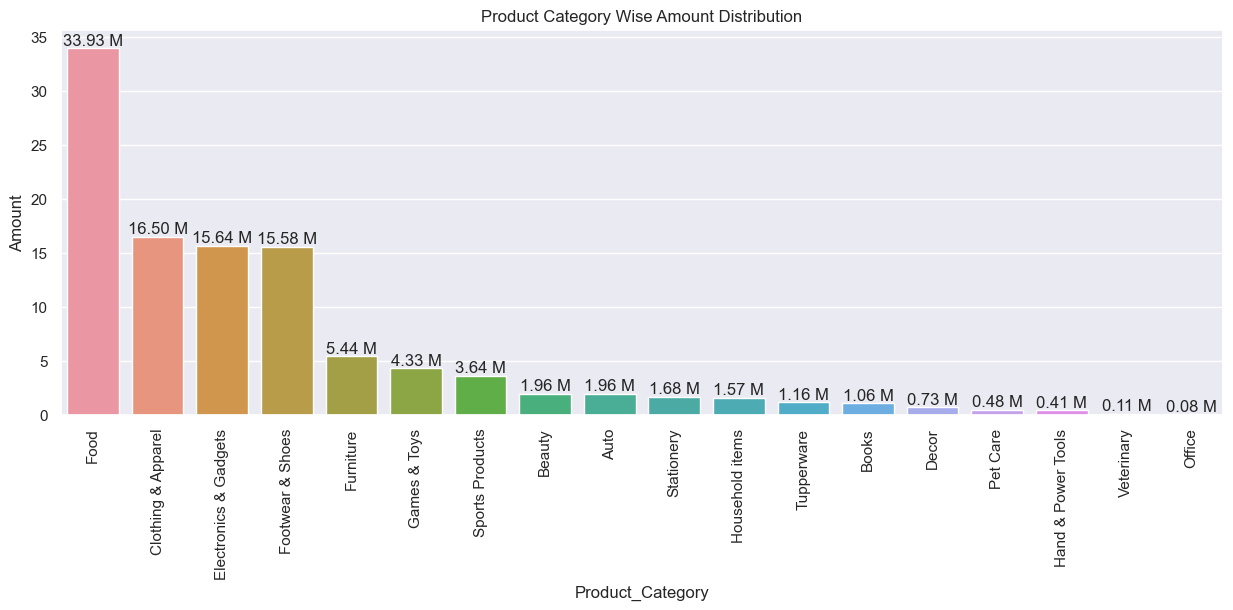

In [104]:
# product category wise Amount distribition
Product_category_amount = diwali_sales_data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False) 
Product_category_amount['Amount'] = Product_category_amount['Amount'] / 1e6  # Convert amount to millions 
dx = sns.barplot(x='Product_Category', y='Amount', data=Product_category_amount) 
plt.title("Product Category Wise Amount Distribution") 
sns.set(rc={'figure.figsize': (15, 5)})
for bars in dx.containers:
    dx.bar_label(bars, fmt='%.2f M')
    
plt.xticks(rotation=90)
plt.show()

#### Most revenue generated from food followed by Clothing and Electronics.

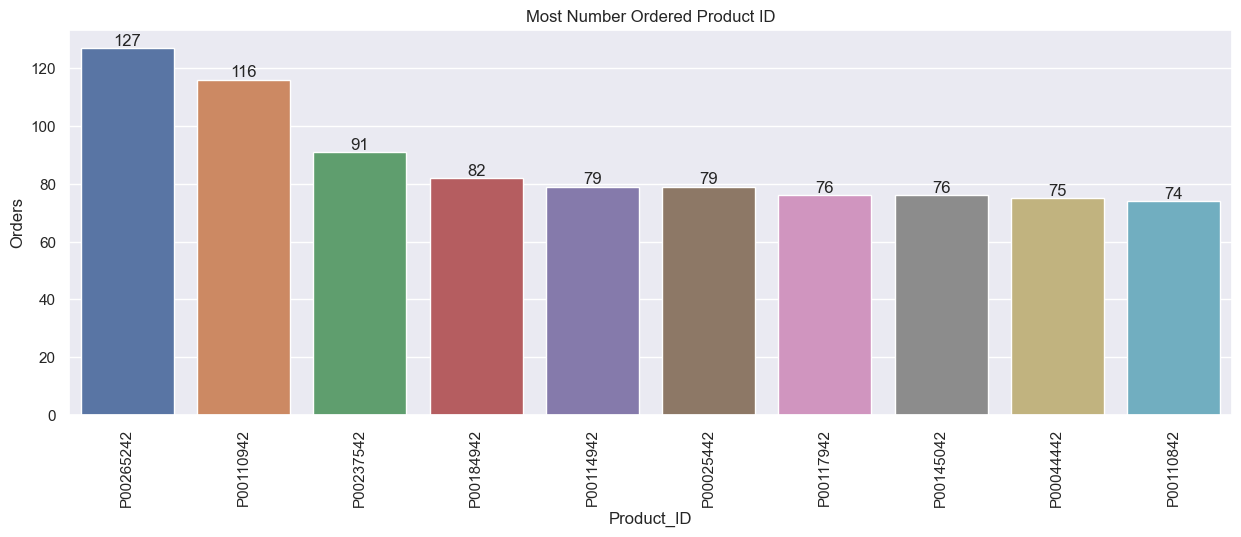

In [106]:
# Stae wise Amount distribition
Product_id_ordered = diwali_sales_data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10) 

dx = sns.barplot(x='Product_ID', y='Orders', data=Product_id_ordered) 
plt.title("Most Number Ordered Product ID") 
sns.set(rc={'figure.figsize': (15, 5)})
for bars in dx.containers:
    dx.bar_label(bars)
    
plt.xticks(rotation=90)
plt.show()

#### Most ordered product ID is P00265242.

# Conclusion

1. Females outperformed males in purchase frequency and expenditure.

2. The age group 26-35 dominated both purchases and revenue.

3. UP, Maharashtra, and Karnataka led in order volume and revenue.

4. Married individuals, especially females, placed more orders and contributed the most revenue.

5. Top revenue-driving sectors: IT, Healthcare, and Aviation.

6. Clothing and Apparel topped orders, while food led in revenue.

7. Product ID P00265242 was the most ordered item.